In [1]:
#Install Required Library

In [2]:
#Import Required Library

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors


import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from plotly.graph_objs import Layout

import os
import warnings, gc

from datetime import datetime, timedelta



In [3]:
#SETTINGS

warnings.filterwarnings("ignore")

init_notebook_mode(connected=True)
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))
colors=px.colors.qualitative.Plotly

In [4]:
#CUSTOM SETTINGS

#FOR PLOTS

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [5]:
#Master Date import

file_path = 'Bloomberg - Test.xlsx'

m_df = pd.read_excel(file_path, sheet_name=None)

m_df_sheet_names = m_df.keys()


In [6]:
m_df_sheet_names

dict_keys(['Sheet3'])

In [7]:
# #For Specific Sheet
# specific_sheet = all_sheets['Sheet1']  # Replace 'Sheet1' with the desired sheet name

# #For All Sheets

# for sheet_name, df in all_sheets.items():
#     # Perform operations on each DataFrame if required
#     print(f"Sheet Name: {sheet_name}")
#     print(df.head())  


df = m_df['Sheet3']

In [8]:
df.columns

Index(['Dates', 'LYB UN Equity'], dtype='object')

In [9]:
#Rename columns
# df = df.rename(columns={'Dates': 'da'})

# columns_mapping = {
#     'Dates': 'da',
#     'OldColumnName1': 'NewColumnName1',
#     'OldColumnName2': 'NewColumnName2',
#     # Add more columns as needed
# }
# df.rename(columns=columns_mapping, inplace=True)


columns_mapping = {
    'Dates': 'Date',
    'LYB UN Equity': 'Close',
    'OldColumnName2': 'NewColumnName2',
    # Add more columns as needed
}
df.rename(columns=columns_mapping, inplace=True)



In [10]:
#To sort dates

# df = df.sort_values(by='Date')
# df = df.sort_values(by='Date', ascending=False)
# df = df.reset_index(drop=True)

df = df.sort_values(by='Date')
df = df.reset_index(drop=True)

In [11]:
#To remove dates with NaN
# df = df.dropna(subset=['Date'])

df = df.dropna(subset=['Close'])
df = df.reset_index(drop=True)

In [12]:
#Cutoff after specific date

cutoff_date = '2010-01-01'
df = df[df['Date'] >= cutoff_date]
df.reset_index(drop=True, inplace=True)

In [79]:
def treturn(input_df):
    input_df['Return'] = (input_df['Close'] / input_df['Close'].shift(1)) - 1 
    input_df.fillna(0, inplace = True)

    return(input_df)


In [80]:
df = treturn(df)

In [13]:
df

,Date,Close
0,2010-10-14,14.9256
1,2010-10-15,14.6383
2,2010-10-18,14.7764
3,2010-10-19,14.6494
4,2010-10-20,14.9863
...,...,...
2834,2021-08-25,101.8300
2835,2021-08-26,100.0600
2836,2021-08-27,102.8800
2837,2021-08-30,101.9400


In [14]:
#Moving averages

df = df.copy()
df['5_MA'] = df['Close'].rolling(window=5).mean()
df['20_MA'] = df['Close'].rolling(window=20).mean()
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['100_MA'] = df['Close'].rolling(window=100).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()



In [15]:
df

,Date,Close,5_MA,20_MA,50_MA,100_MA,200_MA
0,2010-10-14,14.9256,NaN,NaN,NaN,NaN,NaN
1,2010-10-15,14.6383,NaN,NaN,NaN,NaN,NaN
2,2010-10-18,14.7764,NaN,NaN,NaN,NaN,NaN
3,2010-10-19,14.6494,NaN,NaN,NaN,NaN,NaN
4,2010-10-20,14.9863,14.79520,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2834,2021-08-25,101.8300,99.08306,99.765840,99.480162,103.613017,98.443182
2835,2021-08-26,100.0600,99.85830,99.798470,99.455836,103.604884,98.549490
2836,2021-08-27,102.8800,101.01164,100.031430,99.528848,103.614374,98.672677
2837,2021-08-30,101.9400,101.61506,100.238650,99.534608,103.601831,98.774298


In [16]:
df = df.dropna(subset=['200_MA'])
df = df.reset_index(drop=True)

In [17]:
df

,Date,Close,5_MA,20_MA,50_MA,100_MA,200_MA
0,2011-07-20,20.8155,20.76348,21.296045,21.751324,22.225961,20.077584
1,2011-07-21,21.6404,20.89302,21.324555,21.726524,22.223839,20.111158
2,2011-07-22,21.8895,21.05356,21.378810,21.724974,22.223766,20.147414
3,2011-07-25,21.2086,21.21632,21.407875,21.727300,22.215835,20.179575
4,2011-07-26,21.5573,21.42226,21.448285,21.727188,22.206419,20.214115
...,...,...,...,...,...,...,...
2635,2021-08-25,101.8300,99.08306,99.765840,99.480162,103.613017,98.443182
2636,2021-08-26,100.0600,99.85830,99.798470,99.455836,103.604884,98.549490
2637,2021-08-27,102.8800,101.01164,100.031430,99.528848,103.614374,98.672677
2638,2021-08-30,101.9400,101.61506,100.238650,99.534608,103.601831,98.774298


In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df contains your data

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add trace for Close prices
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close', marker_color='black'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['5_MA'], mode='lines', name='5-day MA', marker_color='blue'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['20_MA'], mode='lines', name='20-day MA', marker_color='green'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['50_MA'], mode='lines', name='50-day MA', marker_color='yellow'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['100_MA'], mode='lines', name='100-day MA', marker_color='purple'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['200_MA'], mode='lines', name='200-day MA', marker_color='red'),
    row=1, col=1
)



# Update x-axis options for range selection
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    row=1, col=1
)

# Update layout and display
fig.update_layout(
    title='Close and Moving Average',
    hovermode='x unified',
    height=1000,
    yaxis1=dict(title='Price'),
    showlegend=True
)

fig.show()



In [67]:
df['Close_5_GC'] = (df['Close'] > df['5_MA']) & (df['Close'].shift(1) <= df['5_MA'].shift(1))
df['5_20_GC'] = (df['5_MA'] > df['20_MA']) & (df['5_MA'].shift(1) <= df['20_MA'].shift(1))
df['20_50_GC'] = (df['20_MA'] > df['50_MA']) & (df['20_MA'].shift(1) <= df['50_MA'].shift(1))
df['50_100_GC'] = (df['50_MA'] > df['100_MA']) & (df['50_MA'].shift(1) <= df['100_MA'].shift(1))
df['100_200_GC'] = (df['100_MA'] > df['200_MA']) & (df['100_MA'].shift(1) <= df['200_MA'].shift(1))




In [68]:
df['Close_5_DC'] = (df['Close'] < df['5_MA']) & (df['Close'].shift(1) >= df['5_MA'].shift(1))
df['5_20_DC'] = (df['5_MA'] < df['20_MA']) & (df['5_MA'].shift(1) >= df['20_MA'].shift(1))
df['20_50_DC'] = (df['20_MA'] < df['50_MA']) & (df['20_MA'].shift(1) >= df['50_MA'].shift(1))
df['50_100_DC'] = (df['50_MA'] < df['100_MA']) & (df['50_MA'].shift(1) >= df['100_MA'].shift(1))
df['100_200_DC'] = (df['100_MA'] < df['200_MA']) & (df['100_MA'].shift(1) >= df['200_MA'].shift(1))


In [69]:
signals = ['Close_5_GC', '5_20_GC', '20_50_GC', '50_100_GC', '100_200_GC', 'Close_5_DC', '5_20_DC', '20_50_DC', '50_100_DC', '100_200_DC']

# Shift the signals to the next day and set the first signal as False
for signal in signals:
    df[signal] = df[signal].shift(-1)

# Replace the first row with False
for signal in signals:
    df.at[0, signal] = False

df = df.fillna(False)


In [70]:
df

,Date,Close,5_MA,20_MA,50_MA,100_MA,200_MA,Close_5_GC,5_20_GC,20_50_GC,...,5_20_DC,20_50_DC,50_100_DC,100_200_DC,Gross Long,Gross Short,Net Long,BM SValue,BM SReturn,BM AbsReturn
0,2011-07-20,20.8155,20.76348,21.296045,21.751324,22.225961,20.077584,False,False,False,...,False,False,False,False,0.000000,0.000000,0.000000,0,0,0
1,2011-07-21,21.6404,20.89302,21.324555,21.726524,22.223839,20.111158,False,False,False,...,False,False,False,False,0.000000,0.000000,0.000000,0,0,0
2,2011-07-22,21.8895,21.05356,21.378810,21.724974,22.223766,20.147414,False,False,False,...,False,False,False,False,0.000000,0.000000,0.000000,0,0,0
3,2011-07-25,21.2086,21.21632,21.407875,21.727300,22.215835,20.179575,True,False,False,...,False,False,False,False,0.000000,0.000000,0.000000,0,0,0
4,2011-07-26,21.5573,21.42226,21.448285,21.727188,22.206419,20.214115,False,True,False,...,False,False,False,False,0.100000,0.000000,0.100000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021-08-25,101.8300,99.08306,99.765840,99.480162,103.613017,98.443182,False,True,False,...,False,False,False,False,2.629903,1.647157,0.982746,0,0,0
2636,2021-08-26,100.0600,99.85830,99.798470,99.455836,103.604884,98.549490,False,False,False,...,False,False,False,False,2.629903,1.447157,1.182746,0,0,0
2637,2021-08-27,102.8800,101.01164,100.031430,99.528848,103.614374,98.672677,False,False,False,...,False,False,False,False,2.629903,1.447157,1.182746,0,0,0
2638,2021-08-30,101.9400,101.61506,100.238650,99.534608,103.601831,98.774298,False,False,False,...,False,False,False,False,2.629903,1.447157,1.182746,0,0,0


In [71]:
# Create subplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add trace for Close prices
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close', marker_color='black'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['5_MA'], mode='lines', name='5-day MA', marker_color='blue'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['20_MA'], mode='lines', name='20-day MA', marker_color='green'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['50_MA'], mode='lines', name='50-day MA', marker_color='yellow'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['100_MA'], mode='lines', name='100-day MA', marker_color='purple'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['200_MA'], mode='lines', name='200-day MA', marker_color='red'),
    row=1, col=1
)


# Plotting golden cross points with dates
for col, color in [('Close_5_GC', 'black'),('5_20_GC', 'blue'), ('20_50_GC', 'green'), ('50_100_GC', 'yellow'), ('100_200_GC', 'purple')]:
    crosses = df[df[col]].index
    dates = df.loc[crosses, 'Date']  # Selecting dates for x-axis
    fig.add_trace(
        go.Scatter(x=dates, y=df['Close'][df[col]], mode='markers', 
                   marker=dict(color=color, symbol='triangle-up', size=10), name=col),
        row=1, col=1
    )

# Plotting golden cross points with dates
for col, color in [('Close_5_DC', 'black'),('5_20_DC', 'blue'), ('20_50_DC', 'green'), ('50_100_DC', 'yellow'), ('100_200_DC', 'purple')]:
    crosses = df[df[col]].index
    dates = df.loc[crosses, 'Date']  # Selecting dates for x-axis
    fig.add_trace(
        go.Scatter(x=dates, y=df['Close'][df[col]], mode='markers', 
                   marker=dict(color=color, symbol='triangle-down', size=10), name=col),
        row=1, col=1
    )

# Update x-axis options for range selection
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    row=1, col=1
)

# Update layout and display
fig.update_layout(
    title='Close and Moving Average with Cross Signals',
    hovermode='x unified',
    height=1000,
    yaxis=dict(title='Price'),
    showlegend=True
)

fig.show()


In [73]:
import pandas as pd

positions = {
    'Close_5_GC': 0,
    '5_20_GC': 0,
    '20_50_GC': 0,
    '50_100_GC': 0,
    '100_200_GC': 0,
}

net_long_position = 0

# Simulated strategy implementation
for index, row in df.iterrows():
    for signal in df.columns:
        if 'GC' in signal and row[signal] == 1:  # Golden Cross signal
            weight = {
                'Close_5_GC': 0.1,
                '5_20_GC': 0.2,
                '20_50_GC': 0.4,
                '50_100_GC': 0.6,
                '100_200_GC': 1,
            }[signal]
            positions[signal] += weight
            net_long_position += weight

        elif 'DC' in signal and row[signal] == 1:  # Death Cross signal
            weight = {
                'Close_5_DC': 0.1,
                '5_20_DC': 0.2,
                '20_50_DC': 0.4,
                '50_100_DC': 0.6,
                '100_200_DC': 1,
            }[signal]
            reduction = weight * net_long_position
            positions[signal.replace('DC', 'GC')] -= reduction
            net_long_position -= reduction

# Accumulate data in a list
data = [{'Signal': signal, 'Position': position} for signal, position in positions.items()]
data.append({'Signal': 'Net Long Position', 'Position': net_long_position})

# Create DataFrame from the accumulated data
TS_Position_Size = pd.DataFrame(data)

In [74]:
TS_Position_Size

,Signal,Position
0,Close_5_GC,-1.336796
1,5_20_GC,-0.228636
2,20_50_GC,0.056921
3,50_100_GC,1.393781
4,100_200_GC,1.179201
5,Net Long Position,1.064471


In [75]:
# Initialize positions and create new columns
positions = {
    'Close_5_GC': 0,
    '5_20_GC': 0,
    '20_50_GC': 0,
    '50_100_GC': 0,
    '100_200_GC': 0,
}

net_long_position = 0

# Create new columns for Gross Long, Gross Short, and Net Long
df['Gross Long'] = 0
df['Gross Short'] = 0
df['Net Long'] = 0

# Simulated strategy implementation
for index, row in df.iterrows():
    for signal in df.columns:
        if 'GC' in signal and row[signal] == 1:  # Golden Cross signal
            weight = {
                'Close_5_GC': 0.1,
                '5_20_GC': 0.2,
                '20_50_GC': 0.4,
                '50_100_GC': 0.6,
                '100_200_GC': 1,
            }[signal]
            positions[signal] += weight
            net_long_position += weight

        elif 'DC' in signal and row[signal] == 1:  # Death Cross signal
            weight = {
                'Close_5_DC': 0.1,
                '5_20_DC': 0.2,
                '20_50_DC': 0.4,
                '50_100_DC': 0.6,
                '100_200_DC': 1,
            }[signal]
            reduction = weight * net_long_position
            positions[signal.replace('DC', 'GC')] -= reduction
            net_long_position -= reduction

    # Update the values in the DataFrame for Gross Long, Gross Short, and Net Long
    gross_long = sum([max(0, pos) for pos in positions.values()])
    gross_short = abs(sum([min(0, pos) for pos in positions.values()]))
    net_long = gross_long - gross_short

    df.at[index, 'Gross Long'] = gross_long
    df.at[index, 'Gross Short'] = gross_short
    df.at[index, 'Net Long'] = net_long


      Gross Long  Gross Short  Net Long
0       0.000000     0.000000  0.000000
1       0.000000     0.000000  0.000000
2       0.000000     0.000000  0.000000
3       0.100000     0.000000  0.100000
4       0.270000     0.000000  0.270000
...          ...          ...       ...
2635    2.629903     1.447157  1.182746
2636    2.629903     1.447157  1.182746
2637    2.629903     1.447157  1.182746
2638    2.629903     1.565432  1.064471
2639    2.629903     1.565432  1.064471

[2640 rows x 3 columns]


In [77]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add trace for Close prices
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close', marker_color='black'),
    row=1, col=1
)

# Update x-axis options for range selection
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    row=1, col=1
)

# # Add trace for Net Long positions
net_long_changes = df[df['Net Long'].diff() != 0]
# fig.add_trace(
#         go.Scatter(x=net_long_changes['Date'], y=net_long_changes['Close'],
#                mode='text',
#                text=[f"{round(val, 2)}" for val in net_long_changes['Net Long']],
#                textposition="top left",
#                showlegend=False
#         ),
#     row=1, col=1
# )

net_long_changes['Date'] = pd.to_datetime(net_long_changes['Date'])
net_long_changes = net_long_changes.groupby(net_long_changes['Date'].dt.to_period("M")).first().reset_index(drop=True)

# Add trace for Net Long positions (once a month)
fig.add_trace(
    go.Scatter(
        x=net_long_changes['Date'],
        y=net_long_changes['Close'],
        mode='text',
        text=[f"{round(val, 2)}" for val in net_long_changes['Net Long']],
        textposition="top left",
        showlegend=False
    ),
    row=1,
    col=1
)

# Update layout and display
fig.update_layout(
    title='Close and Net Long Position Changes',
    hovermode='x unified',
    height=1000,
    yaxis=dict(title='Price'),
    showlegend=True
)

fig.show()


In [78]:
#FUNCTION: Strategy Return

def strat_return(input_df, Net_Position_Col ,strat_value, strat_return, strat_abs_return, ts_type):
    
    #Net Position 
    input_df[Net_Position_Col]
   
    #Strategy Value ("xxx SValue")
    input_df[strat_value] = 0
    
    #Strategy Return ("xxx SReturn")
    input_df[strat_return] = 0

    #Absolute Return ('xxx AbsReturn)
    input_df[strat_abs_return] = 0

    
    for i in range(len(input_df)):

        #Daily Return of the Strategy
        if input_df.at[i, Net_Position_Col ] > 0:
            input_df.at[i, strat_return] = input_df.at[i, 'Return']

        if ts_type == 'Short':
            input_df.at[i, strat_return] = input_df.at[i, strat_return] * -1 
                
        #Daily Strategy Value
        if input_df.at[i, Net_Position_Col ] > 0:
            if i == 0:
                if input_df.at[i, Net_Position_Col ] == 1:
                    input_df.at[i, strat_value] = 1
                else:
                    pass
            elif input_df.at[i-1, strat_value] == 0:
                input_df.at[i, strat_value] = 1 * (1+ input_df.at[i, strat_return])
            else:
                new_inv = input_df.at[i, Net_Position_Col ] - input_df.at[i-1, Net_Position_Col ] 
                input_df.at[i, strat_value] = (input_df.at[i-1, strat_value]+ new_inv) * (1+ input_df.at[i, strat_return])

        #Daily Absoulte Return
        input_df.at[i, strat_abs_return] = input_df.at[i, strat_value] - input_df.at[i, Net_Position_Col]
    
    input_df.fillna(0, inplace = True)
    


In [88]:
strat_return(df, 'Net Long', 'TS SValue', 'TS SReturn', 'TS AbsReturn', "Long")


In [89]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add trace for Close prices
fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Net Long'], mode='lines', name='Close', marker_color='black'),
    row=1, col=1
)

# Update x-axis options for range selection
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    row=1, col=1
)

# Update layout and display
fig.update_layout(
    title='Net Long / Sizing',
    hovermode='x unified',
    height=1000,
    yaxis=dict(title='Trade Size'),
    showlegend=True
)

fig.show()


In [90]:
#FUNCTION: Compute the number of days each trade takes to become positive. 


def trade_days(input_df, strat_inv_column):
    #Dataframe to collect the number of days each trade took to become positive
    data = {'Trade': [0, 0],'Trade Date': [0, 0],'Purchase Price': [0, 0], 'Positive Close': [0, 0], 'Positive Date': [0,0], 'Days to Positive': [0,0]}
    trade_df = pd.DataFrame(data)

    #Initialize Values
    new_trade = 0
    trade_days = 0
    positive_trade = 0
    trade_number = 0
        
    for i in range(len(input_df)):
        
        #Register a new trade
        if i == 0:
            if input_df.at[i, strat_inv_column] == 1:
               new_trade = 1
               trade_number += 1
        else:
            if input_df.at[i, strat_inv_column] - input_df.at[i-1, strat_inv_column] == 1:
                new_trade = 1
                trade_number += 1
        
        # If there is a new trade, find the days it takes to reach positive value
        if new_trade == 1:
            purchase_price = input_df.at[i, 'Close']
        
            for a in range(len(input_df)-i):
                
                trade_days += 1

                if input_df.at[a+i, 'Close'] > purchase_price:
                    positive_trade = 1
                    trade_df.at[trade_number, 'Trade'] = trade_number
                    trade_df.at[trade_number, 'Trade Date'] = i
                    trade_df.at[trade_number, 'Purchase Price'] = purchase_price
                    trade_df.at[trade_number, 'Positive Close'] = input_df.at[a+i, 'Close']
                    trade_df.at[trade_number, 'Positive Date'] = a+i
                    trade_df.at[trade_number, 'Days to Positive'] = trade_days-1
                    
                    #Reset values
                    new_trade = 0
                    positive_trade = 0
                    trade_days = 0
                    break
                else:
                    pass

            
        else:
            pass

    trade_df = trade_df.iloc[1:]
    
    return(trade_df)
                

In [92]:
TS_trade_df = trade_days(df, 'Net Long')

In [93]:
TS_trade_df

,Trade,Trade Date,Purchase Price,Positive Close,Positive Date,Days to Positive
1,1.0,1008.0,77.1827,77.8599,1009.0,1.0
2,2.0,1410.0,71.1184,71.7158,1411.0,1.0
3,3.0,2398.0,68.2383,69.2253,2402.0,4.0


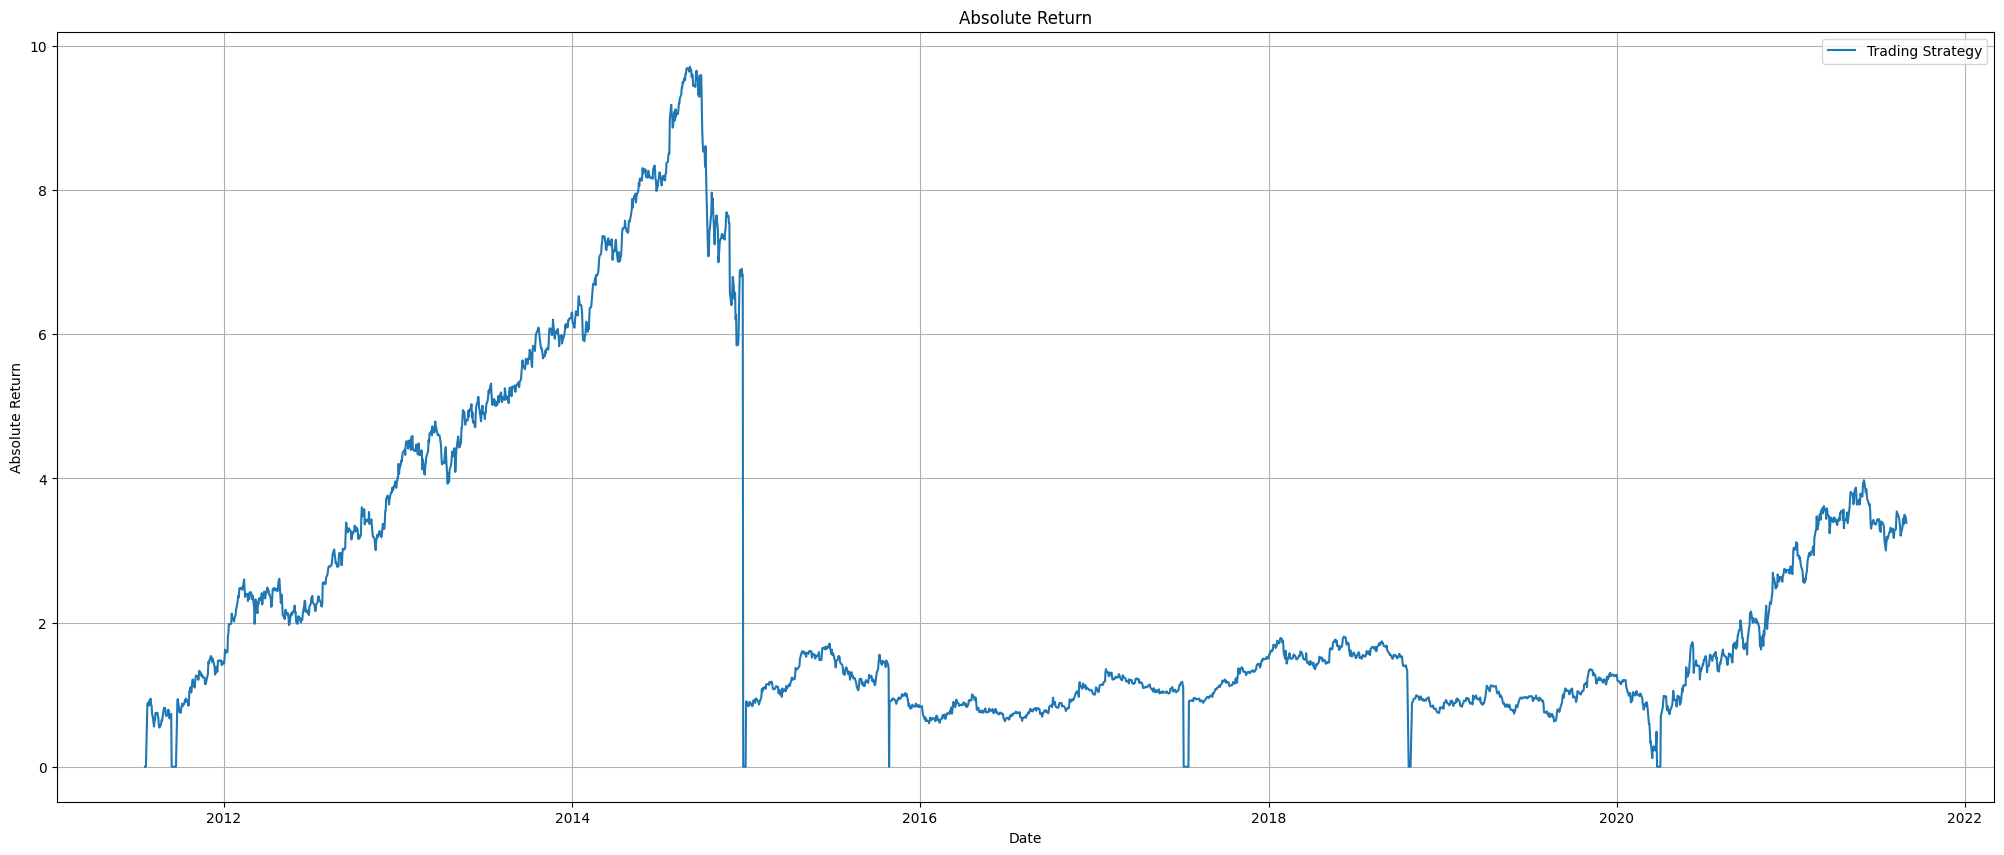

In [98]:
# Assuming 'Date' is a datetime column in your DataFrame
plt.figure(figsize=(25, 10))

# Plot 'TS PValue'
plt.plot(df['Date'], df['TS AbsReturn'], label='Trading Strategy')


# Plot 'CReturns'
plt.xlabel('Date')
plt.ylabel('Absolute Return')
plt.title('Absolute Return')
plt.grid(True)
plt.legend()

x_indices = np.arange(0, len(df), 30)
plt.show()

In [95]:
df

,Date,Close,5_MA,20_MA,50_MA,100_MA,200_MA,Close_5_GC,5_20_GC,20_50_GC,...,Gross Long,Gross Short,Net Long,BM SValue,BM SReturn,BM AbsReturn,Return,TS SValue,TS SReturn,TS AbsReturn
0,2011-07-20,20.8155,20.76348,21.296045,21.751324,22.225961,20.077584,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2011-07-21,21.6404,20.89302,21.324555,21.726524,22.223839,20.111158,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039629,0.000000,0.000000,0.000000
2,2011-07-22,21.8895,21.05356,21.378810,21.724974,22.223766,20.147414,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011511,0.000000,0.000000,0.000000
3,2011-07-25,21.2086,21.21632,21.407875,21.727300,22.215835,20.179575,True,False,False,...,0.100000,0.000000,0.100000,0.968894,-0.031106,0.868894,-0.031106,0.968894,-0.031106,0.868894
4,2011-07-26,21.5573,21.42226,21.448285,21.727188,22.206419,20.214115,False,True,False,...,0.270000,0.000000,0.270000,1.157619,0.016441,0.887619,0.016441,1.157619,0.016441,0.887619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021-08-25,101.8300,99.08306,99.765840,99.480162,103.613017,98.443182,False,True,False,...,2.629903,1.447157,1.182746,4.632011,0.004584,3.449265,0.004584,4.632011,0.004584,3.449265
2636,2021-08-26,100.0600,99.85830,99.798470,99.455836,103.604884,98.549490,False,False,False,...,2.629903,1.447157,1.182746,4.551498,-0.017382,3.368752,-0.017382,4.551498,-0.017382,3.368752
2637,2021-08-27,102.8800,101.01164,100.031430,99.528848,103.614374,98.672677,False,False,False,...,2.629903,1.447157,1.182746,4.679773,0.028183,3.497027,0.028183,4.679773,0.028183,3.497027
2638,2021-08-30,101.9400,101.61506,100.238650,99.534608,103.601831,98.774298,False,False,False,...,2.629903,1.565432,1.064471,4.519821,-0.009137,3.455349,-0.009137,4.519821,-0.009137,3.455349
